In [225]:
# Environment Setup
# Imports
import pandas as pd

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, mean_absolute_error, accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

import xgboost as xgb

# Read file
pd.options.mode.chained_assignment = None
df = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test1.csv')
df_test_kaggle = pd.read_csv('data/test2.csv')

#set seed
seed = 2307

In [281]:
df_test.head()

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v776,v777,v778,v779,v780,v781,v782,v783,v784,label
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,4,0,0,1,0,2,0,0,0,0,...,155,143,69,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [11]:
df['v100'].describe()

count    30000.000000
mean       106.775000
std         94.392504
min          0.000000
25%          0.000000
50%        114.000000
75%        202.000000
max        255.000000
Name: v100, dtype: float64

In [358]:
# Data Preprocessing
X = df.loc[:, "v1":"v784"]
Y = df.loc[:, "label"]
label_mapping = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

X_train = X
X_test = df_test.loc[:, "v1":"v784"]
Y_train = Y
Y_test = df_test.loc[:, "label"]

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=seed)
X_all = X
Y_all = Y

X_canvas = df_test.loc[:, "v1":"v784"]
X_kaggle = df_test_kaggle.loc[:, "v1":"v784"]

In [68]:
mapping = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:1, 7:0, 8:0, 9:0}
Y_train_shirt = Y_train.map(mapping)
Y_test_shirt = Y_test.map(mapping)
Y_train_shirt

6319     0
3013     0
17379    0
2686     0
21949    0
        ..
14791    0
14723    0
28083    0
28729    0
29221    0
Name: label, Length: 21000, dtype: int64

In [386]:
X['v1'].describe()

count    30000.00000
mean         0.00090
std          0.09183
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max         14.00000
Name: v1, dtype: float64

In [359]:
# Normalization
X_train = X_train/255
X_test = X_test/255
X_kaggle = X_kaggle/255

X_all = X_all/255

#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

#X_kaggle = scaler.transform(X_kaggle)

In [22]:
# Dimensionality reduction LDA
lda = LDA(n_components=len(label_mapping)-1)  # n_components can be set to the number of classes minus 1
X_train_lda = lda.fit_transform(X_train, Y_train)
X_test_lda = lda.transform(X_test)
X_kaggle_lda = lda.transform(X_kaggle)

In [54]:
# Remove Outliers (?)
from sklearn.ensemble import IsolationForest

# Create and fit the model
iso_forest = IsolationForest()  # contamination is the proportion of outliers
iso_forest.fit(X_train)
outliers = iso_forest.predict(X_train)

In [57]:
for i in outliers:
    if i == 0:
        print('a')

In [246]:
# PCA
pca = PCA(n_components=0.95, random_state=seed)  # Preserve 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_kaggle_pca = pca.transform(X_kaggle)

X_all_pca = pca.transform(X_all)


In [207]:
X_train_pca.shape

(21000, 83)

In [ ]:
# Feature Engineering

In [13]:
Y_train.value_counts()

label
6    2155
1    2129
9    2117
8    2112
7    2108
5    2092
2    2090
4    2082
0    2070
3    2045
Name: count, dtype: int64

In [264]:
# SVM
svm = SVC(kernel='rbf',
          C = 15.0,
          gamma = 0.01,
          shrinking = True,
          random_state = seed)
svm.fit(X_train_pca, Y_train)

Y_pred = svm.predict(X_test_pca)
print("Accuracy:", accuracy_score(Y_test, Y_pred))

#Y_pred_train = svm.predict(X_train_pca)
#print("Train Accuracy:", accuracy_score(Y_train, Y_pred_train))

#svm.fit(X_train, Y_train)
#Y_pred = svm.predict(X_test)
#print("Accuracy:", accuracy_score(Y_test, Y_pred))


# 2.0: 88.6
# 3.0: 88.8
# 4.0: 88.9
# 4.5: 89.03
# 5.0: 89.16
# 5.5: 89.08
# 6.0: 89.03
# 7.0: 88.87

Accuracy: 0.8854444444444445


Confusion Matrix:
[[769   1   5  21   1   0  78   0  12   0]
 [  0 889   0  20   0   0   3   0   1   0]
 [ 16   1 739   9  66   0  65   0   0   0]
 [ 20   4   5 790  32   0  16   0   9   0]
 [  1   0  82  41 702   0  62   0   4   0]
 [  0   0   0   1   0 838   1  42   5   9]
 [144   2  80  22  61   0 606   0   8   0]
 [  0   0   0   0   0  13   0 874   0  17]
 [  4   0   9   2   4   1  10   1 874   0]
 [  0   1   0   0   0  10   1  34   2 860]]


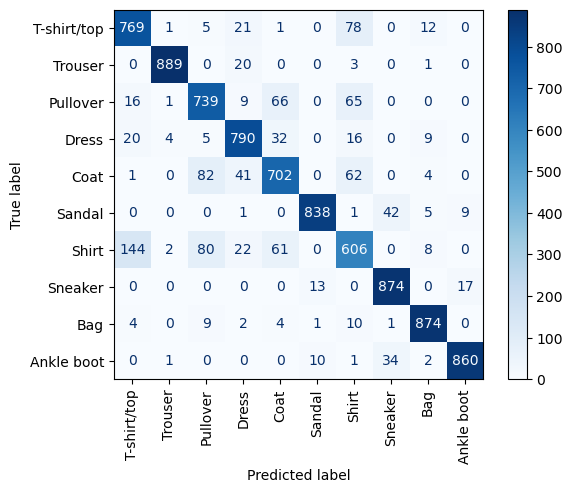

In [211]:
cm = confusion_matrix(Y_test, Y_pred)

print("Confusion Matrix:")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_mapping)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.show()

In [268]:
# SVM grid search
parameters = {'C':[1.0, 5.0, 10.0, 15.0, 25.0],
             'gamma':[0.02, 0.03, 0.04, 0.05]}

cls_svm = SVC(kernel='rbf',
          shrinking = True,
          random_state = seed)

cls_svm_cv = GridSearchCV(cls_svm, parameters, cv = 10, scoring='f1_macro', verbose=2)

cls_svm_cv.fit(X_train_pca, Y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] END ..................................C=1.0, gamma=0.02; total time=   8.9s
[CV] END ..................................C=1.0, gamma=0.02; total time=   9.1s
[CV] END ..................................C=1.0, gamma=0.02; total time=   8.9s
[CV] END ..................................C=1.0, gamma=0.02; total time=   9.2s
[CV] END ..................................C=1.0, gamma=0.02; total time=   9.2s
[CV] END ..................................C=1.0, gamma=0.02; total time=   9.0s
[CV] END ..................................C=1.0, gamma=0.02; total time=   9.2s
[CV] END ..................................C=1.0, gamma=0.02; total time=   9.1s
[CV] END ..................................C=1.0, gamma=0.02; total time=   9.2s
[CV] END ..................................C=1.0, gamma=0.02; total time=   9.0s
[CV] END ..................................C=1.0, gamma=0.03; total time=  10.9s
[CV] END ..................................C=1

GridSearchCV(cv=10, estimator=SVC(random_state=2307),
             param_grid={'C': [1.0, 5.0, 10.0, 15.0, 25.0],
                         'gamma': [0.02, 0.03, 0.04, 0.05]},
             scoring='f1_macro', verbose=2)

In [269]:
cls_svm_cv.cv_results_

{'mean_fit_time': array([ 6.58084311,  8.18869033, 10.08112314, 12.19043007,  6.35733845,
         8.18134682, 10.25884397, 12.6893234 ,  6.4424057 ,  8.29731693,
        10.34366305, 13.07543142,  6.48910809,  8.32928066, 10.33112886,
        12.93831315,  6.55650394,  8.33844519, 10.46977804, 13.18092625]),
 'std_fit_time': array([0.10890837, 0.13648554, 0.11293523, 0.04934933, 0.11422679,
        0.11565352, 0.1315274 , 0.04322789, 0.08344525, 0.13321331,
        0.07629542, 0.19677773, 0.0970219 , 0.13849035, 0.07813135,
        0.14713644, 0.11507932, 0.11494339, 0.24853662, 0.2035375 ]),
 'mean_score_time': array([2.50108767, 2.65252404, 2.8061399 , 2.95426688, 2.40222621,
        2.67334497, 2.89177363, 3.08543956, 2.41846261, 2.70086162,
        2.91159945, 3.10422609, 2.43642116, 2.71057322, 2.91732166,
        3.11530488, 2.44942102, 2.71908326, 2.93990777, 3.13113518]),
 'std_score_time': array([0.0265647 , 0.01093682, 0.02340483, 0.00916075, 0.01049465,
        0.02468647, 

In [270]:
cls_svm_cv.best_params_

{'C': 5.0, 'gamma': 0.03}

In [271]:
Y_pred = cls_svm_cv.predict(X_test_pca)
print("Accuracy:", accuracy_score(Y_test, Y_pred))

Y_pred_train = cls_svm_cv.predict(X_train_pca)
print("Train Accuracy:", accuracy_score(Y_train, Y_pred_train))

Accuracy: 0.8912222222222222
Train Accuracy: 0.9872857142857143


In [229]:
# Gaussian Naive Bayes
gnb = GaussianNB(var_smoothing=0.000000001)

gnb.fit(X_train, Y_train)

Y_pred = gnb.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))

Y_pred_train = gnb.predict(X_train)
print("Train Accuracy:", accuracy_score(Y_train, Y_pred_train))

Accuracy: 0.5997777777777777
Train Accuracy: 0.599047619047619


In [118]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=seed)

# Resample the data
X_train_pca_resampled, Y_train_shirt_resampled = smote.fit_resample(X_train_pca, Y_train_shirt)

In [84]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')

# Train the model
log_reg.fit(X_train_pca_resampled, Y_train_shirt_resampled)

Y_pred = log_reg.predict(X_test_pca)
print("Accuracy:", accuracy_score(Y_test_shirt, Y_pred))

Y_pred_train = log_reg.predict(X_train_pca)
print("Train Accuracy:", accuracy_score(Y_train_shirt, Y_pred_train))

Accuracy: 0.8432222222222222
Train Accuracy: 0.8469047619047619


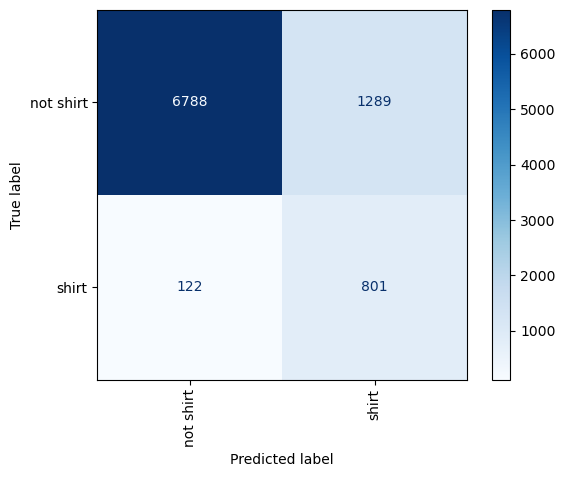

In [85]:
cm = confusion_matrix(Y_test_shirt, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['not shirt', 'shirt'])
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.show()

In [127]:
# Binary xgboost
cls_1 = xgb.XGBClassifier(objective="binary:logistic",
                          tree_method="exact",
                          eval_metric="logloss",
                          max_depth = 7,
                          n_estimators = 700,
                          learning_rate = 0.01,
                          #reg_alpha = 0,
                          #reg_lambda = 0,
                          random_state = seed)

cls_1.fit(X_train_pca_resampled, Y_train_shirt_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=700, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=2307, ...)

Accuracy: 0.9098888888888889
Train Accuracy: 0.9781428571428571


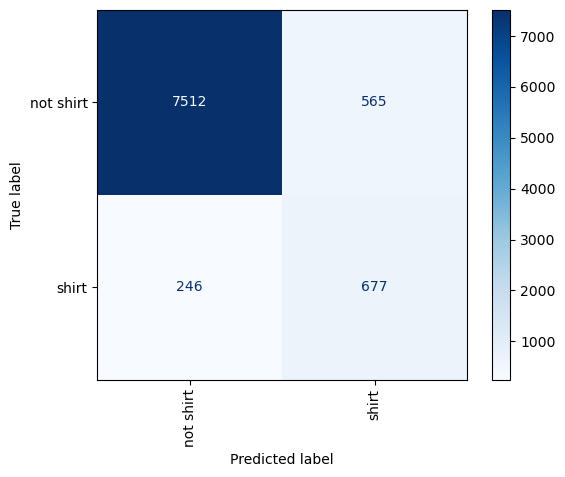

In [128]:
Y_pred = cls_1.predict(X_test_pca)
print("Accuracy:", accuracy_score(Y_test_shirt, Y_pred))
Y_pred_train = cls_1.predict(X_train_pca)
print("Train Accuracy:", accuracy_score(Y_train_shirt, Y_pred_train))
cm = confusion_matrix(Y_test_shirt, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['not shirt', 'shirt'])
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.show()

In [205]:
# Random Forest
rf = RandomForestClassifier(n_estimators=1500,
                            max_depth=12,
                            criterion="entropy",
                            #ccp_alpha=1.0,
                            random_state=seed)

rf.fit(X_train_pca, Y_train)

Y_pred = rf.predict(X_test_pca)
print("Accuracy:", accuracy_score(Y_test, Y_pred))

Y_pred_train = rf.predict(X_train_pca)
print("Train Accuracy:", accuracy_score(Y_train, Y_pred_train))
#0.84

Accuracy: 0.8403333333333334
Train Accuracy: 0.9791428571428571


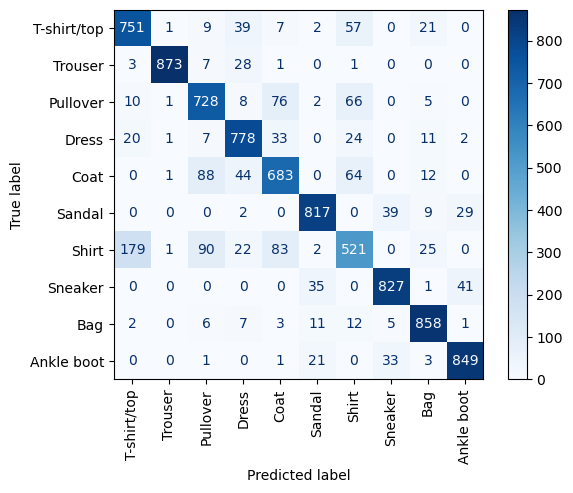

In [193]:
Y_pred = rf.predict(X_test_pca)
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_mapping)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.show()

In [18]:
cls_1 = xgb.XGBClassifier(objective="multi:softmax",
                          tree_method="exact",
                          eval_metric="mlogloss",
                          random_state = seed)

cls_1.fit(X_train_pca, Y_train)
Y_pred = cls_1.predict(X_test_pca)
print("Accuracy:", accuracy_score(Y_test, Y_pred))
Y_pred_train = cls_1.predict(X_train_pca)
print("Train Accuracy:", accuracy_score(Y_train, Y_pred_train))

Accuracy: 0.8657777777777778
Train Accuracy: 1.0


In [21]:
# KNN
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, Y_train)

y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))

Y_pred_train = knn.predict(X_train)
print("Train Accuracy:", accuracy_score(Y_train, Y_pred_train))

Accuracy: 0.8657777777777778
Train Accuracy: 0.7976190476190477


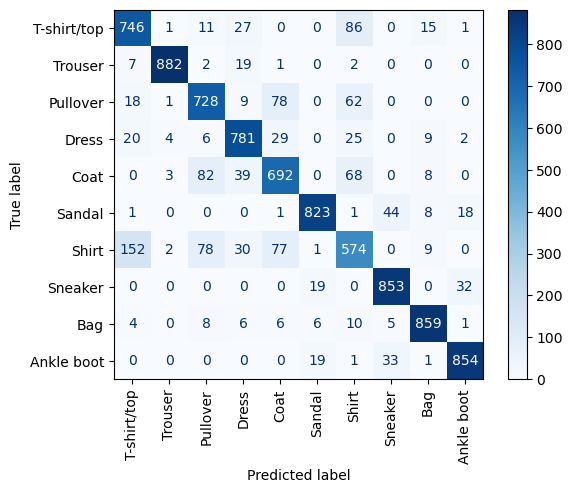

In [22]:
#y_pred = knn.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_mapping)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.show()

In [235]:
# Decision Tree
clf = DecisionTreeClassifier(criterion='entropy', 
                             splitter='best', 
                             max_depth=None, 
                             #min_samples_split=2, 
                             #min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, 
                             max_features=None, 
                             max_leaf_nodes=None, 
                             min_impurity_decrease=0, 
                             class_weight=None, 
                             #ccp_alpha=0.001,
                             random_state=seed)

clf.fit(X_train_pca, Y_train)
Y_pred = clf.predict(X_test_pca)
print("Accuracy:", accuracy_score(Y_test, Y_pred))
Y_pred_train = clf.predict(X_train_pca)
print("Train Accuracy:", accuracy_score(Y_train, Y_pred_train))

DecisionTreeClassifier(criterion='log_loss', min_impurity_decrease=0,
                       random_state=2307)

In [14]:
cls_1 = xgb.XGBClassifier(objective="multi:softmax",
                          tree_method="exact",
                          eval_metric="mlogloss",
                          random_state = seed)

cls_1.fit(X_train, Y_train)
Y_pred = cls_1.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))
Y_pred_train = cls_1.predict(X_train)
print("Train Accuracy:", accuracy_score(Y_train, Y_pred_train))

Accuracy: 0.8833333333333333
Train Accuracy: 1.0


In [23]:
cls_1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', predictor=None, ...)

In [24]:
# Evaluate F1-score
f1_scores = f1_score(Y_test, Y_pred, average=None)
macro_f1 = f1_score(Y_test, Y_pred, average='macro')

print("F1-scores for each class:", f1_scores)
print("Macro-average F1-score:", macro_f1)

F1-scores for each class: [0.82166302 0.98179812 0.81363386 0.88672769 0.80404267 0.96446701
 0.69084821 0.94569391 0.97291321 0.95479603]
Macro-average F1-score: 0.8836583743640307


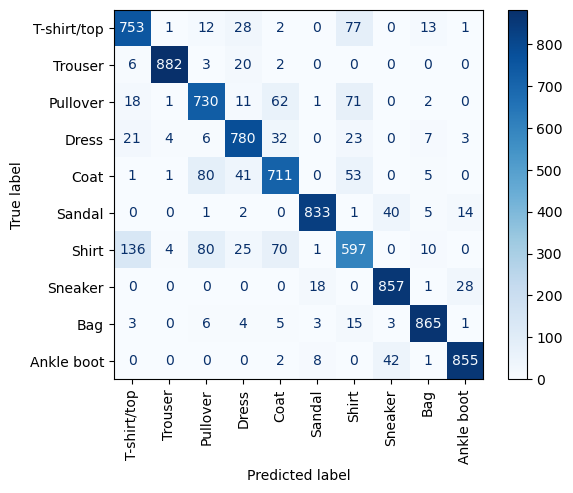

In [25]:
# Evaluate confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_mapping)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.show()

In [284]:
cls_xgb = xgb.XGBClassifier(#max_depth = 3,
                          #n_estimators = 200,
                          #learning_rate = 0.3,
                          objective="multi:softmax",
                          tree_method="approx",
                          eval_metric="mlogloss",
                          reg_alpha = 0,
                          reg_lambda = 0,
                          min_child_weight = 0,
                          random_state = 0)
cls_xgb.fit(X_train_pca, Y_train)

Y_pred = cls_xgb.predict(X_test_pca)
print("Validation Accuracy:", accuracy_score(Y_test, Y_pred))
Y_pred_train = cls_xgb.predict(X_train_pca)
print("Train Accuracy:", accuracy_score(Y_train, Y_pred_train))

Validation Accuracy: 0.8647777777777778
Train Accuracy: 1.0


In [43]:
# Apply grid search
parameters = {'max_depth':[8, 12], 
              'n_estimators':[800, 1000, 1200],
              'reg_lambda': [0, 100],
              'min_child_weight': [0, 0.1]}

cls_2 = xgb.XGBClassifier(objective="multi:softmax",
                          tree_method="approx",
                          eval_metric="mlogloss",
                          learning_rate=0.3,
                          random_state = seed)

clf = GridSearchCV(cls_2, parameters, cv = 10, scoring='f1_macro', verbose=2)

clf.fit(X_train_pca, Y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV] END max_depth=8, min_child_weight=0, n_estimators=800, reg_lambda=0; total time= 9.1min
[CV] END max_depth=8, min_child_weight=0, n_estimators=800, reg_lambda=0; total time= 9.1min
[CV] END max_depth=8, min_child_weight=0, n_estimators=800, reg_lambda=0; total time= 9.4min
[CV] END max_depth=8, min_child_weight=0, n_estimators=800, reg_lambda=0; total time=10.0min
[CV] END max_depth=8, min_child_weight=0, n_estimators=800, reg_lambda=0; total time= 9.6min
[CV] END max_depth=8, min_child_weight=0, n_estimators=800, reg_lambda=0; total time= 9.1min
[CV] END max_depth=8, min_child_weight=0, n_estimators=800, reg_lambda=0; total time= 9.1min
[CV] END max_depth=8, min_child_weight=0, n_estimators=800, reg_lambda=0; total time= 9.2min
[CV] END max_depth=8, min_child_weight=0, n_estimators=800, reg_lambda=0; total time= 9.1min
[CV] END max_depth=8, min_child_weight=0, n_estimators=800, reg_lambda=0; total time= 9.1min
[CV] EN

KeyboardInterrupt: 

In [17]:
X_kaggle = df_test_kaggle.loc[:, "v1":"v784"]
output = cls_1.predict(X_kaggle)
output_df = pd.DataFrame(output, columns = ['label'])
output_df.to_csv('test_output.csv', sep=",", float_format='%d',index_label="id")

In [272]:
#X_kaggle = df_test_kaggle.loc[:, "v1":"v784"]
#X_kaggle_lda = lda.transform(X_kaggle)
output = cls_svm_cv.predict(X_kaggle_pca)
output_df = pd.DataFrame(output, columns = ['label'])
output_df.to_csv('test_output.csv', sep=",", float_format='%d',index_label="id")

In [191]:
# Trying out voting ensemble classifier
from sklearn.ensemble import VotingClassifier

cls_1 = SVC(kernel='rbf',
          C = 5.0,
          shrinking = True,
          probability = True,
          random_state = seed)

cls_2 = xgb.XGBClassifier(max_depth = 7,
                          n_estimators = 200,
                          learning_rate = 0.3,
                          objective="multi:softmax",
                          tree_method="approx",
                          eval_metric="mlogloss",
                          reg_alpha = 0,
                          reg_lambda = 0,
                          min_child_weight = 0,
                          random_state = 0)

cls_3 = KNeighborsClassifier(n_neighbors=100)

# Create the voting classifier
v_clf = VotingClassifier(estimators=[
    ('svm', cls_1),
    ('xgb', cls_2),
], voting='soft')  # Use soft voting to average probabilities

v_clf.fit(X_train_pca, Y_train)

Y_pred = v_clf.predict(X_test_pca)
print("Accuracy:", accuracy_score(Y_test, Y_pred))

Y_pred_train = v_clf.predict(X_train_pca)
print("Train Accuracy:", accuracy_score(Y_train, Y_pred_train))

Accuracy: 0.8798888888888889
Train Accuracy: 0.9790952380952381


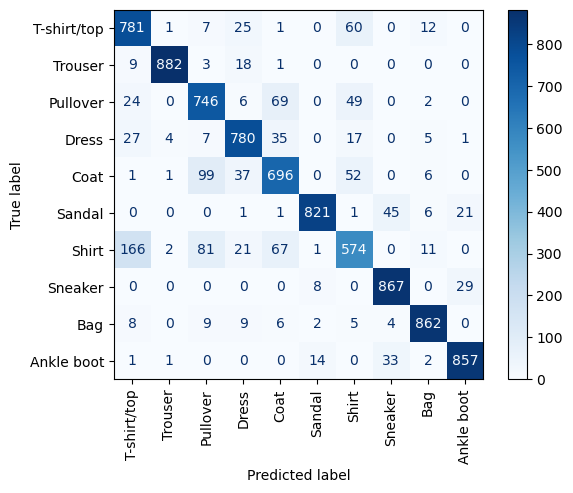

In [190]:
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_mapping)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.show()

In [287]:
from sklearn.ensemble import StackingClassifier
# Trying out stacking
pretrained_models = [('xgb', cls_xgb), ('svm', cls_svm_cv)]

# Define meta-learner (e.g., Logistic Regression)
meta_learner = LogisticRegression()

# Stacking Classifier with pre-trained models
stacking_clf = StackingClassifier(estimators=pretrained_models, final_estimator=meta_learner, cv=5)

# Fit the StackingClassifier using the pre-trained models
# Note: The pre-trained models will not be retrained, just their predictions will be used
stacking_clf.fit(X_train_pca, Y_train)

# Make predictions and evaluate
Y_pred = stacking_clf.predict(X_test_pca)
accuracy = accuracy_score(Y_test, Y_pred)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] END ..................................C=1.0, gamma=0.02; total time=   9.2s
[CV] END ..................................C=1.0, gamma=0.02; total time=   8.9s
[CV] END ..................................C=1.0, gamma=0.02; total time=   8.8s
[CV] END ..................................C=1.0, gamma=0.02; total time=   9.1s
[CV] END ..................................C=1.0, gamma=0.02; total time=   8.9s
[CV] END ..................................C=1.0, gamma=0.02; total time=   9.1s
[CV] END ..................................C=1.0, gamma=0.02; total time=   8.9s
[CV] END ..................................C=1.0, gamma=0.02; total time=   9.2s
[CV] END ..................................C=1.0, gamma=0.02; total time=   8.9s
[CV] END ..................................C=1.0, gamma=0.02; total time=   9.0s
[CV] END ..................................C=1.0, gamma=0.03; total time=  10.8s
[CV] END ..................................C=1

KeyboardInterrupt: 

In [391]:
# HOG
from skimage.feature import hog
#def calc_hog_features(X, image_shape=(28, 28), pixels_per_cell=(8, 8)):
#    fd_list = []
#    for _, row in X.iterrows():
#        img = row.values.reshape(image_shape)
#        fd = hog(img, orientations=8, pixels_per_cell=pixels_per_cell, cells_per_block=(1, 1))
#        fd_list.append(fd)
#    
#    return np.array(fd_list)

def get_hog_features(row, image_shape=(28, 28)):
    # Step 1: Reshape the flattened row (1D array) back to 2D
    reshaped_image = row.values.reshape(image_shape)
    
    # Step 2: Apply HOG feature extraction
    hog_features = hog(reshaped_image, 
                       orientations=16, 
                       pixels_per_cell=(4, 4),
                       cells_per_block=(2, 2), 
                       block_norm='L2-Hys', 
                       visualize=False)
    return hog_features

In [392]:
#hog_features_list = df.apply(get_hog_features_from_row, axis=1)
X_train_hog = X_train.apply(get_hog_features, axis=1)
X_test_hog = X_test.apply(get_hog_features, axis=1)

X_train_hog_df = pd.DataFrame(X_train_hog.tolist())
X_test_hog_df = pd.DataFrame(X_test_hog.tolist())
#X_train_hog = calc_hog_features(X_train)
#X_test_hog = calc_hog_features(X_test)

In [367]:
#X_train_comb = X_train.join(X_train_hog_df)
#X_test_comb = X_test.join(X_test_hog_df)

#X_train_comb.columns = X_train_comb.columns.astype(str)
#X_test_comb.columns = X_test_comb.columns.astype(str)

In [361]:
X_train_hog_df.isnull().sum()

0       0
1       0
2       0
3       0
4       0
       ..
1759    0
1760    0
1761    0
1762    0
1763    0
Length: 1764, dtype: int64

In [364]:
X_train_comb.isnull().sum()

v1      0
v2      0
v3      0
v4      0
v5      0
       ..
1759    0
1760    0
1761    0
1762    0
1763    0
Length: 2548, dtype: int64

In [393]:
pca = PCA(n_components=0.95, random_state=seed)  # Preserve 95% of the variance
X_train_hog_pca = pca.fit_transform(X_train_hog_df)
X_test_hog_pca = pca.transform(X_test_hog_df)
#X_train_comb_pca = pca.fit_transform(X_train_comb)
#X_test_comb_pca = pca.transform(X_test_comb)

In [394]:
# SVM HOG
svm = SVC(kernel='rbf',
          C = 5.0,
          gamma = 0.03,
          shrinking = True,
          random_state = seed)
svm.fit(X_train_hog_pca, Y_train)

Y_pred = svm.predict(X_test_hog_pca)
print("Accuracy:", accuracy_score(Y_test, Y_pred))

Y_pred_train = svm.predict(X_train_hog_pca)
print("Train Accuracy:", accuracy_score(Y_train, Y_pred_train))

# 16: 0.8945
# 16: 2,2: 
# 24: 0.888
# 32: 0.8945

Accuracy: 0.9105
Train Accuracy: 0.9965


In [333]:
# SVM grid search
parameters = {'C':[1.0, 5.0, 10.0, 15.0, 25.0],
             'gamma':[0.01, 0.03, 0.05]}

cls_svm_hog = SVC(kernel='rbf',
          shrinking = True,
          random_state = seed)

cls_svm_hog_cv = GridSearchCV(cls_svm_hog, parameters, cv = 3, scoring='f1_macro', verbose=2)

cls_svm_hog_cv.fit(X_train_hog_df_pca, Y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END .................................C=1.0, gamma=0.001; total time= 1.0min
[CV] END .................................C=1.0, gamma=0.001; total time= 1.1min
[CV] END .................................C=1.0, gamma=0.001; total time= 1.1min
[CV] END ..................................C=1.0, gamma=0.01; total time= 1.2min
[CV] END ..................................C=1.0, gamma=0.01; total time= 1.2min
[CV] END ..................................C=1.0, gamma=0.01; total time= 1.2min
[CV] END ...................................C=1.0, gamma=0.1; total time= 4.0min
[CV] END ...................................C=1.0, gamma=0.1; total time= 4.0min
[CV] END ...................................C=1.0, gamma=0.1; total time= 7.8min
[CV] END ...................................C=1.0, gamma=1.0; total time= 4.0min
[CV] END ...................................C=1.0, gamma=1.0; total time= 4.0min
[CV] END ...................................C=1.

GridSearchCV(cv=3, estimator=SVC(random_state=2307),
             param_grid={'C': [1.0, 5.0, 10.0, 15.0, 25.0],
                         'gamma': [0.001, 0.01, 0.1, 1.0]},
             scoring='f1_macro', verbose=2)

In [335]:
cls_svm_hog_cv.cv_results_

{'mean_fit_time': array([ 35.3086102 ,  42.1345373 , 270.94922392, 195.79980795,
         27.2717824 ,  49.11109559, 201.89811762, 211.48578437,
         27.43539341,  53.17106342, 205.05012266, 196.44789529,
         25.38929733,  48.62594891, 196.38664834, 196.59248503,
         25.20202231,  49.03282531, 197.21763754, 204.30233447]),
 'std_fit_time': array([1.01251605e+00, 5.50095289e-01, 1.08103777e+02, 1.01550353e+00,
        1.32817734e-01, 1.70657183e-01, 6.57560506e+00, 7.63642117e-01,
        1.52819546e-01, 1.56569069e-01, 6.12010462e+00, 2.30876744e-01,
        9.91213512e-02, 1.00699792e-01, 2.42117349e-01, 3.86245579e-01,
        2.07998400e-01, 8.20865954e-02, 2.09772462e-01, 5.62634662e+00]),
 'mean_score_time': array([27.44959823, 27.68703572, 45.27680413, 45.64353681, 22.37342676,
        28.80929637, 45.40583698, 45.93934576, 21.77233656, 29.09479173,
        45.43014002, 45.65328129, 21.3673687 , 28.81278865, 45.38387203,
        45.69630925, 21.25791136, 28.81955401

0 - 255
0 - 80